This notebook will demonstrate the process of training a binary perceptron classifier on a toy two-dimensional dataset.

First we must load the dataset.

In [1]:
class1<-read.table("Class1.txt",header=TRUE,sep=",") 
class1.dim<-dim(class1)
class1.label<-rep(1,class1.dim[1])
class1<-cbind(class1,class1.label)
names(class1)<-c("weight","height","label")
class1

weight,height,label
0.132,0.757,1
0.722,0.888,1
0.095,0.804,1
0.633,0.530,1
0.472,0.701,1
0.294,0.183,1
0.179,0.874,1
0.023,0.664,1
0.116,0.978,1
0.054,0.786,1


In [2]:
class2<-read.table("Class2.txt",header=TRUE,sep=",")
class2.dim<-dim(class2)
class2.label<-rep(-1,class2.dim[1])
class2<-cbind(class2,class2.label)
names(class2)<-c("weight","height","label")
class2

weight,height,label
0.407,0.347,-1
0.726,0.761,-1
0.644,0.415,-1
0.076,0.143,-1
0.110,0.010,-1
0.907,0.859,-1
0.836,0.211,-1
0.954,0.706,-1
0.807,0.466,-1
0.619,0.489,-1


In [3]:
class1.2<-rbind(class1,class2)
class1.2

weight,height,label
0.132,0.757,1
0.722,0.888,1
0.095,0.804,1
0.633,0.530,1
0.472,0.701,1
0.294,0.183,1
0.179,0.874,1
0.023,0.664,1
0.116,0.978,1
0.054,0.786,1


We then place the data into a dataframe to make it easier to visualize:

In [4]:
d.set<-data.frame(cbind(rep(1,nrow(class1.2)),class1.2))
names(d.set)<-c("bias","weight","height","label")
d.set

bias,weight,height,label
1,0.132,0.757,1
1,0.722,0.888,1
1,0.095,0.804,1
1,0.633,0.530,1
1,0.472,0.701,1
1,0.294,0.183,1
1,0.179,0.874,1
1,0.023,0.664,1
1,0.116,0.978,1
1,0.054,0.786,1


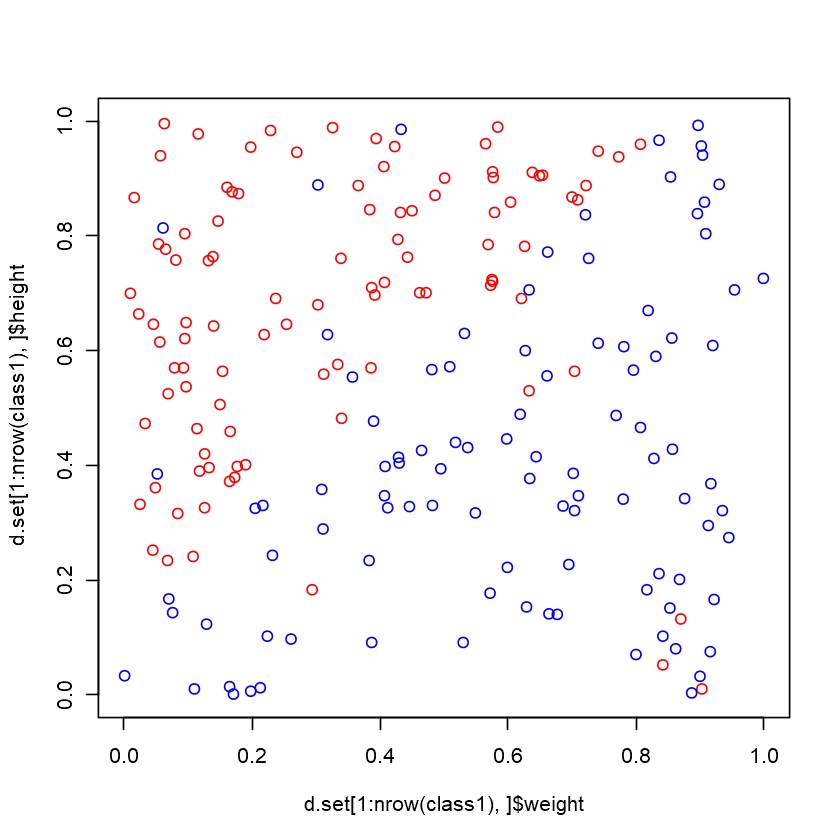

In [5]:
plot(d.set[1:nrow(class1),]$weight,d.set[1:nrow(class1),]$height,xlim=c(0:1),ylim=c(0:1),col="red")
points(d.set[nrow(class1)+1:nrow(class1.2),]$weight,d.set[nrow(class1)+1:nrow(class1.2),]$height,col="blue")

Next we will train the perceptron. First we randomize the training data:

In [7]:
samples<-sample(nrow(d.set))
randomized.set<-d.set[samples,]
randomized.set

,bias,weight,height,label
193,1,0.902,0.957,-1
140,1,0.598,0.446,-1
39,1,0.807,0.960,1
20,1,0.108,0.241,1
174,1,0.909,0.804,-1
172,1,0.876,0.342,-1
132,1,0.710,0.347,-1
38,1,0.198,0.955,1
128,1,0.828,0.412,-1
112,1,0.629,0.153,-1


Then we provide the perceptron learning algorithm:

In [8]:
perceptron <- function(x, eta, niter) {
        
        # initialize weight vector
        weight <- rep(0.1, dim(x)[2]-1)
        errors <- rep(0, niter)
        label.index<-length(x[1,])
        features<-x[,-label.index]
        labels<-x[,label.index]
        
        # loop over number of epochs niter
        for (jj in 1:niter) {
                
                # loop through training data set
                for (ii in 1:nrow(x)) 
                {
                        
                        # Predict binary label using activation function
                        z <- sum(weight[1:length(weight)] * as.numeric(features[ii,])) 
                        if(z < 0) 
                        {
                                ypred <- -1
                        } else {
                                ypred <- 1
                        }
                        
                        # Change weight - the formula doesn't do anything 
                        # if the predicted value is correct
                        weightdiff <- eta * (as.numeric(labels[ii]) - ypred) * as.numeric(features[ii,])
                        weight <- weight + weightdiff
                        
                        # update error rate
                        if ((as.numeric(labels[ii]) - ypred) != 0.0) 
                        {
                                errors[jj] <- errors[jj] + 1
                        }
                        
                }
        }
        
        # weight to decide between the two species 
        print(weight)
        print(errors)
        return(list(v1=weight,v2=errors))
}

Then we execute it using 500 iterations and eta=0.05:

In [9]:
iterations<-500
weight.err <- perceptron(randomized.set, 0.05, iterations)

[1]  0.1000 -0.2757  0.3720
  [1] 55 45 42 41 45 44 44 50 43 46 47 43 47 40 48 43 45 43 45 43 45 43 47 48 43
 [26] 45 43 45 43 45 43 45 43 47 48 43 45 43 45 40 48 43 47 44 43 45 44 43 47 42
 [51] 44 44 46 41 47 45 47 40 48 43 45 43 45 43 47 48 43 42 45 46 41 47 43 43 43
 [76] 47 44 43 47 48 43 45 43 45 43 45 43 45 43 47 48 43 45 43 45 40 48 43 47 44
[101] 43 45 44 43 47 42 44 44 46 41 47 45 47 40 48 43 45 43 45 43 47 48 43 42 46
[126] 45 44 40 43 46 45 40 43 46 45 40 43 47 44 43 47 48 43 45 43 45 43 45 43 45
[151] 43 47 48 43 45 43 45 40 48 43 47 44 43 45 44 43 47 42 44 44 46 41 47 45 47
[176] 40 48 43 45 43 45 43 47 48 43 42 45 46 41 47 43 43 42 40 40 40 40 40 40 40
[201] 40 40 40 40 40 40 45 46 47 45 43 43 47 44 43 47 48 43 45 43 45 40 48 43 47
[226] 43 47 48 43 45 44 43 47 48 43 43 46 43 45 44 43 45 43 45 43 47 44 46 41 47
[251] 43 47 42 44 44 42 45 47 47 49 43 47 40 48 43 45 43 47 48 43 42 46 45 44 40
[276] 43 46 45 40 43 46 45 40 43 47 44 43 47 48 43 45 43 45 43 45 43 45 43 47 48


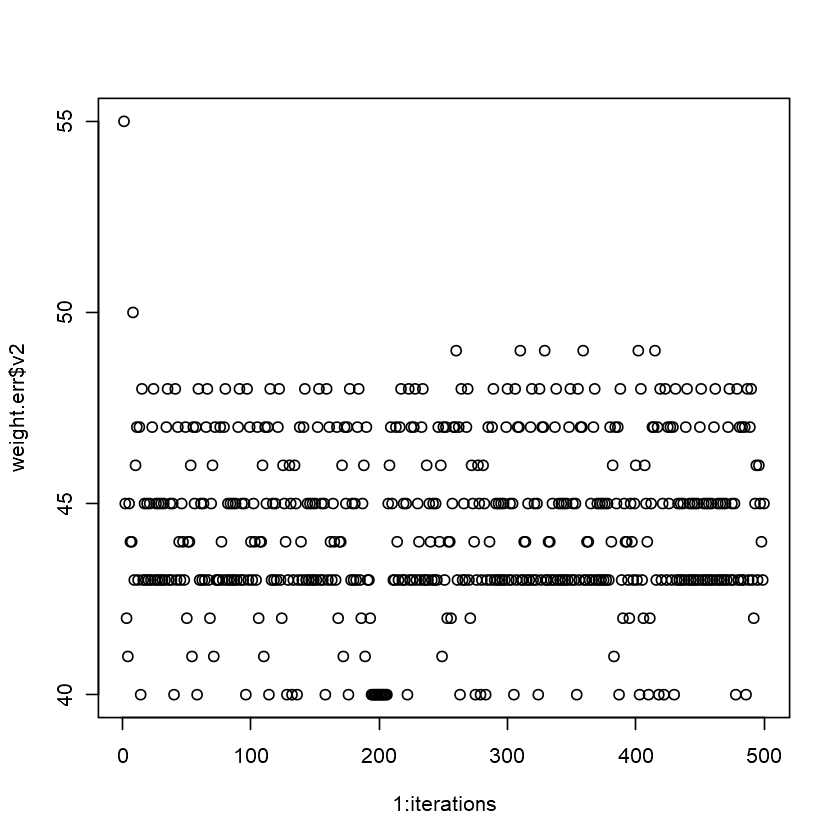

In [10]:
plot(1:iterations,weight.err$v2)

Then we use the results to plot a decision surface:

[1] 0.741129

[1] -0.2688172

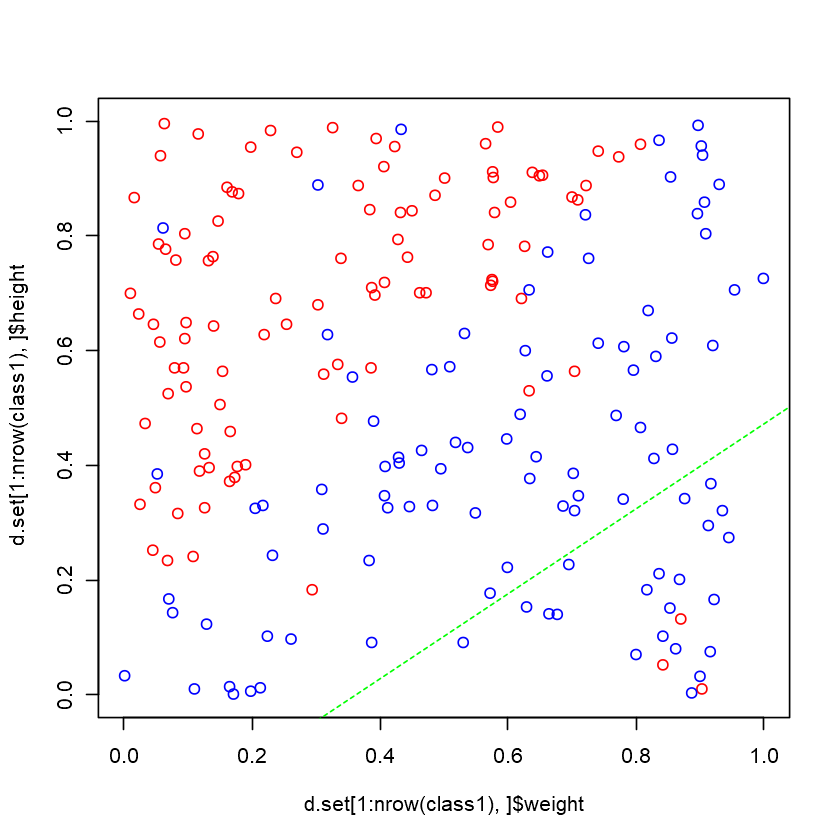

In [12]:
plot(d.set[1:nrow(class1),]$weight,d.set[1:nrow(class1),]$height,xlim=c(0:1),ylim=c(0:1),col="red")
points(d.set[nrow(class1)+1:nrow(class1.2),]$weight,d.set[nrow(class1)+1:nrow(class1.2),]$height,col="blue")
slope<-weight.err$v1[2]/weight.err$v1[3]*(-1)
intercept<-weight.err$v1[1]/weight.err$v1[3]*(-1)
abline(intercept,slope,col="green",lty=2)
slope
intercept